## **Homework 1** Problem 2

In [2]:
%matplotlib inline

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from Canvas and put into your Google Drive.
Mount your Google Drive to this notebook.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive. 

In [4]:
from scipy.io import loadmat
mnist = loadmat('/content/gdrive/My Drive/UW/EEP596/HW1/mnist.mat')
traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']
testlabels = mnist['testlabels']
print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)
print(testlabels.shape)



(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000, 1)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

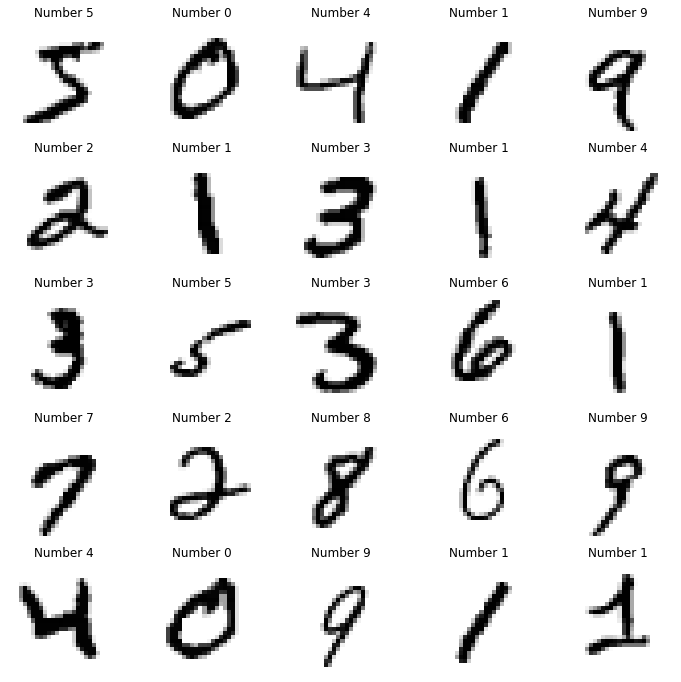

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

In [6]:
# TODO: implement PCA
import numpy as np
from numpy import linalg as LA
from sklearn import preprocessing
from sklearn.decomposition import PCA

k = 625

# PCA for training data
pca = PCA(n_components=k)
pca_train = pca.fit(traindata)
reduce_traindata = pca_train.transform(traindata)
reduce_validdata = pca_train.transform(validdata)
reduce_testdata = pca_train.transform(testdata)

**Please type your answers for the discussion questions here.**

## **Homework 1** Problem 3

### (a) $k$-Nearest Neighbor Classifier (Supervised Learning)

Implement the $k$-nearest neighbor classifier with Euclidean distance on the MNIST dataset.


In [7]:
from sklearn.neighbors import KNeighborsClassifier

def knn(traindata, trainlabels, testdata, k=1):
  # TODO: implement k-NN
  neigh = KNeighborsClassifier(n_neighbors=k, p=2)
  train_neigh = neigh.fit(traindata, trainlabels)
  return train_neigh.predict(testdata)


Evaluate the performance by classification accuracy on validation set with different number of training data.

In [8]:
import random
from sklearn.metrics import accuracy_score

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
accuracy_raw = []
for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  traindata_rand = [traindata[i] for i in sel]
  trainlabel_rand = [trainlabels[i] for i in sel]
  pred_valid = knn(traindata_rand, trainlabel_rand, validdata, k = 1)
  accuracy_raw.append(accuracy_score(validlabels, pred_valid))
  # TODO: run k-NN using raw training data


In [9]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
accuracy_pca = []
for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)

  # TODO: run k-NN using pca data
  traindata_rand = [reduce_traindata[i] for i in sel]
  trainlabel_rand = [trainlabels[i] for i in sel]
  pred_valid = knn(traindata_rand, trainlabel_rand, reduce_validdata, k = 1)
  accuracy_pca.append(accuracy_score(validlabels, pred_valid))  
  # TODO: evaluate classification accuracy

Draw the learning curve.

Accuracy Raw = [0.8832, 0.9134, 0.939, 0.9513, 0.9641, 0.9712]


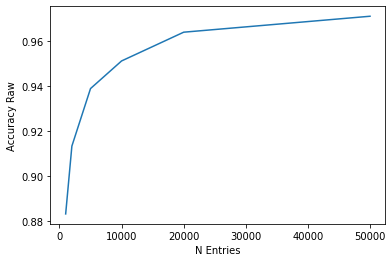

Accuracy PCA = [0.8957, 0.9212, 0.9368, 0.9512, 0.9649, 0.9712]


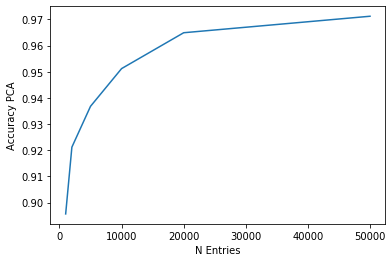

In [10]:
import matplotlib.pyplot as plt

print(f'Accuracy Raw = {accuracy_raw}')
plt.plot(n_entries, accuracy_raw)
plt.xlabel('N Entries')
plt.ylabel('Accuracy Raw')
plt.show()

print(f'Accuracy PCA = {accuracy_pca}')
plt.plot(n_entries, accuracy_pca)
plt.xlabel('N Entries')
plt.ylabel('Accuracy PCA')
plt.show()

Evaluate the classification accuracy with different hyperparamter $k$.

In [11]:
kSet = [2, 3, 5, 10, 50]
accuracy_k = []
for k in kSet:
  print(k)
  pred_valid = knn(reduce_traindata, trainlabels, reduce_validdata, k)
  accuracy_k.append(accuracy_score(validlabels, pred_valid))

#Takes about 49 mins

2
3
5
10
50


In [12]:
print(kSet)
print(accuracy_k)
#Result
# kSet = [2, 3, 5, 10, 50]
# accuracy_k = [0.9667, 0.972, 0.9718, 0.9701, 0.9517]
# Choose k = 3 in the next step

[2, 3, 5, 10, 50]
[0.9667, 0.972, 0.9718, 0.9701, 0.9517]


In [13]:
from sklearn.metrics import accuracy_score
#k = 3
pred_test = knn(reduce_traindata, trainlabels, reduce_testdata, k = 3)
accuracy_test = accuracy_score(testlabels, pred_test)
print(accuracy_test)

0.9681


**Please type your answers for the discussion questions here.**

### (b) $k$-means Clustering (Unsupervised Learning)

Implement $k$-Means clustering algorithm and report classification accuracies.

In [14]:
from sklearn.cluster import KMeans

In [15]:
n_cluster = 10
print('train')
kmeansdata = KMeans(n_cluster)
kmeansdata.fit(reduce_traindata)
print('valid')
kmeans_valid = kmeansdata.predict(reduce_validdata)
print('test')
kmeans_test = kmeansdata.predict(reduce_testdata)

train
valid
test


###K mean for train data

In [16]:
from collections import Counter

#train_data kmean labels
### Results: some of the majority labels in clusters has the same ground truth label
### For Example: cluster1:label = 1, cluster2:label = 1, both of them are 1
### Does that make sense?

label = kmeansdata.labels_
count1=count2=count3=count4=count5=count6=count7=count8=count9=count0 = 0
cluster1 = Counter()
cluster2 = Counter()
cluster3 = Counter()
cluster4 = Counter()
cluster5 = Counter()
cluster6 = Counter()
cluster7 = Counter()
cluster8 = Counter()
cluster9 = Counter()
cluster0 = Counter()
for i in range(len(label)):
  if label[i] == 1:
    cluster1[trainlabels[i]] += 1
    count1 += 1
  if label[i] == 2:
    cluster2[trainlabels[i]] += 1
    count2 += 1
  if label[i] == 3:
    cluster3[trainlabels[i]] += 1
    count3 += 1
  if label[i] == 4:
    cluster4[trainlabels[i]] += 1
    count4 += 1
  if label[i] == 5:
    cluster5[trainlabels[i]] += 1
    count5 += 1
  if label[i] == 6:
    cluster6[trainlabels[i]] += 1
    count6 += 1
  if label[i] == 7:
    cluster7[trainlabels[i]] += 1
    count7 += 1
  if label[i] == 8:
    cluster8[trainlabels[i]] += 1
    count8 += 1
  if label[i] == 9:
    cluster9[trainlabels[i]] += 1
    count9 += 1
  if label[i] == 0:
    cluster0[trainlabels[i]] += 1
    count0 += 1

#printting out data----------------------------------
print('cluster 0---------')
print('label', 'counts')
maxLabel = 0
for i in cluster0.keys():
  maxLabel = max(maxLabel, cluster0[i])
  print((i, cluster0[i]))
print('')
print(f'label: {max(cluster0, key=cluster0.get)}')
print(f'accuracy: {maxLabel/count0}')
print('')

print('cluster 1---------')
print('label', 'counts')
maxLabel = 0
for i in cluster1.keys():
  maxLabel = max(maxLabel, cluster1[i])
  print((i, cluster1[i]))
print('')
print(f'label: {max(cluster1, key=cluster1.get)}')
print(f'accuracy: {maxLabel/count1}')
print('')

print('cluster 2---------')
print('label', 'counts')
maxLabel = 0
for i in cluster2.keys():
  maxLabel = max(maxLabel, cluster2[i])
  print((i, cluster2[i]))
print('')
print(f'label: {max(cluster2, key=cluster2.get)}')
print(f'accuracy: {maxLabel/count2}')
print('')

print('cluster 3---------')
print('label', 'counts')
maxLabel = 0
for i in cluster3.keys():
  maxLabel = max(maxLabel, cluster3[i])
  print((i, cluster3[i]))
print('')
print(f'label: {max(cluster3, key=cluster3.get)}')
print(f'accuracy: {maxLabel/count3}')
print('')

print('cluster 4---------')
print('label', 'counts')
maxLabel = 0
for i in cluster4.keys():
  maxLabel = max(maxLabel, cluster4[i])
  print((i, cluster4[i]))
print('')
print(f'label: {max(cluster4, key=cluster4.get)}')
print(f'accuracy: {maxLabel/count4}')
print('')

print('cluster 5---------')
print('label', 'counts')
maxLabel = 0
for i in cluster5.keys():
  maxLabel = max(maxLabel, cluster5[i])
  print((i, cluster5[i]))
print('')
print(f'label: {max(cluster5, key=cluster5.get)}')
print(f'accuracy: {maxLabel/count5}')
print('')

print('cluster 6---------')
print('label', 'counts')
maxLabel = 0
for i in cluster6.keys():
  maxLabel = max(maxLabel, cluster6[i])
  print((i, cluster6[i]))
print('')
print(f'label: {max(cluster6, key=cluster6.get)}')
print(f'accuracy: {maxLabel/count6}')
print('')

print('cluster 7---------')
print('label', 'counts')
maxLabel = 0
for i in cluster7.keys():
  maxLabel = max(maxLabel, cluster7[i])
  print((i, cluster7[i]))
print('')
print(f'label: {max(cluster7, key=cluster7.get)}')
print(f'accuracy: {maxLabel/count7}')
print('')

print('cluster 8---------')
print('label', 'counts')
maxLabel = 0
for i in cluster8.keys():
  maxLabel = max(maxLabel, cluster8[i])
  print((i, cluster8[i]))
print('')
print(f'label: {max(cluster8, key=cluster8.get)}')
print(f'accuracy: {maxLabel/count8}')
print('')

print('cluster 9---------')
print('label', 'counts')
maxLabel = 0
for i in cluster9.keys():
  maxLabel = max(maxLabel, cluster9[i])
  print((i, cluster9[i]))
print('')
print(f'label: {max(cluster9, key=cluster9.get)}')
print(f'accuracy: {maxLabel/count9}')
print('')

cluster 0---------
label counts
(5, 1467)
(3, 940)
(8, 2480)
(0, 471)
(2, 116)
(1, 4)
(9, 38)
(4, 10)
(6, 91)
(7, 2)

label: 8
accuracy: 0.4413596725395978

cluster 1---------
label counts
(0, 3891)
(2, 52)
(5, 53)
(6, 67)
(3, 27)
(9, 24)
(7, 8)
(8, 25)
(4, 4)

label: 0
accuracy: 0.9373644904842207

cluster 2---------
label counts
(6, 3791)
(2, 144)
(0, 207)
(5, 126)
(4, 121)
(8, 47)
(9, 6)
(3, 63)
(7, 3)
(1, 10)

label: 6
accuracy: 0.8390880920761399

cluster 3---------
label counts
(1, 2457)
(5, 613)
(7, 199)
(4, 203)
(8, 330)
(6, 150)
(2, 320)
(9, 68)
(3, 74)
(0, 28)

label: 1
accuracy: 0.5531292210715893

cluster 4---------
label counts
(4, 1814)
(9, 1105)
(1, 3)
(2, 199)
(7, 439)
(8, 114)
(6, 551)
(3, 50)
(0, 88)
(5, 153)

label: 4
accuracy: 0.4016829052258636

cluster 5---------
label counts
(4, 1220)
(7, 2414)
(9, 1484)
(2, 44)
(0, 15)
(5, 202)
(8, 183)
(3, 31)
(1, 5)
(6, 1)

label: 7
accuracy: 0.4311484193606001

cluster 6---------
label counts
(2, 3452)
(7, 28)
(5, 8)
(0, 28)


### K mean for valid data

In [17]:
label = kmeans_valid

count1=count2=count3=count4=count5=count6=count7=count8=count9=count0 = 0
cluster1 = Counter()
cluster2 = Counter()
cluster3 = Counter()
cluster4 = Counter()
cluster5 = Counter()
cluster6 = Counter()
cluster7 = Counter()
cluster8 = Counter()
cluster9 = Counter()
cluster0 = Counter()
for i in range(len(label)):
  if label[i] == 1:
    cluster1[validlabels[i]] += 1
    count1 += 1
  if label[i] == 2:
    cluster2[validlabels[i]] += 1
    count2 += 1
  if label[i] == 3:
    cluster3[validlabels[i]] += 1
    count3 += 1
  if label[i] == 4:
    cluster4[validlabels[i]] += 1
    count4 += 1
  if label[i] == 5:
    cluster5[validlabels[i]] += 1
    count5 += 1
  if label[i] == 6:
    cluster6[validlabels[i]] += 1
    count6 += 1
  if label[i] == 7:
    cluster7[validlabels[i]] += 1
    count7 += 1
  if label[i] == 8:
    cluster8[validlabels[i]] += 1
    count8 += 1
  if label[i] == 9:
    cluster9[validlabels[i]] += 1
    count9 += 1
  if label[i] == 0:
    cluster0[validlabels[i]] += 1
    count0 += 1

#printting out data----------------------------------
print('cluster 0---------')
print('label', 'counts')
maxLabel = 0
for i in cluster0.keys():
  maxLabel = max(maxLabel, cluster0[i])
  print((i, cluster0[i]))
print('')
print(f'label: {max(cluster0, key=cluster0.get)}')
print(f'accuracy: {maxLabel/count0}')
print('')

print('cluster 1---------')
print('label', 'counts')
maxLabel = 0
for i in cluster1.keys():
  maxLabel = max(maxLabel, cluster1[i])
  print((i, cluster1[i]))
print('')
print(f'label: {max(cluster1, key=cluster1.get)}')
print(f'accuracy: {maxLabel/count1}')
print('')

print('cluster 2---------')
print('label', 'counts')
maxLabel = 0
for i in cluster2.keys():
  maxLabel = max(maxLabel, cluster2[i])
  print((i, cluster2[i]))
print('')
print(f'label: {max(cluster2, key=cluster2.get)}')
print(f'accuracy: {maxLabel/count2}')
print('')

print('cluster 3---------')
print('label', 'counts')
maxLabel = 0
for i in cluster3.keys():
  maxLabel = max(maxLabel, cluster3[i])
  print((i, cluster3[i]))
print('')
print(f'label: {max(cluster3, key=cluster3.get)}')
print(f'accuracy: {maxLabel/count3}')
print('')

print('cluster 4---------')
print('label', 'counts')
maxLabel = 0
for i in cluster4.keys():
  maxLabel = max(maxLabel, cluster4[i])
  print((i, cluster4[i]))
print('')
print(f'label: {max(cluster4, key=cluster4.get)}')
print(f'accuracy: {maxLabel/count4}')
print('')

print('cluster 5---------')
print('label', 'counts')
maxLabel = 0
for i in cluster5.keys():
  maxLabel = max(maxLabel, cluster5[i])
  print((i, cluster5[i]))
print('')
print(f'label: {max(cluster5, key=cluster5.get)}')
print(f'accuracy: {maxLabel/count5}')
print('')

print('cluster 6---------')
print('label', 'counts')
maxLabel = 0
for i in cluster6.keys():
  maxLabel = max(maxLabel, cluster6[i])
  print((i, cluster6[i]))
print('')
print(f'label: {max(cluster6, key=cluster6.get)}')
print(f'accuracy: {maxLabel/count6}')
print('')

print('cluster 7---------')
print('label', 'counts')
maxLabel = 0
for i in cluster7.keys():
  maxLabel = max(maxLabel, cluster7[i])
  print((i, cluster7[i]))
print('')
print(f'label: {max(cluster7, key=cluster7.get)}')
print(f'accuracy: {maxLabel/count7}')
print('')

print('cluster 8---------')
print('label', 'counts')
maxLabel = 0
for i in cluster8.keys():
  maxLabel = max(maxLabel, cluster8[i])
  print((i, cluster8[i]))
print('')
print(f'label: {max(cluster8, key=cluster8.get)}')
print(f'accuracy: {maxLabel/count8}')
print('')

print('cluster 9---------')
print('label', 'counts')
maxLabel = 0
for i in cluster9.keys():
  maxLabel = max(maxLabel, cluster9[i])
  print((i, cluster9[i]))
print('')
print(f'label: {max(cluster9, key=cluster9.get)}')
print(f'accuracy: {maxLabel/count9}')
print('')

cluster 0---------
label counts
(8, 569)
(5, 327)
(3, 211)
(0, 102)
(2, 20)
(6, 12)
(1, 1)
(9, 6)
(7, 1)
(4, 3)

label: 8
accuracy: 0.4544728434504792

cluster 1---------
label counts
(0, 784)
(9, 7)
(3, 6)
(5, 8)
(7, 5)
(6, 7)
(2, 5)
(8, 5)

label: 0
accuracy: 0.9480048367593712

cluster 2---------
label counts
(6, 783)
(4, 13)
(0, 36)
(5, 26)
(2, 16)
(3, 3)
(8, 8)
(9, 2)
(1, 1)

label: 6
accuracy: 0.8817567567567568

cluster 3---------
label counts
(2, 45)
(8, 68)
(7, 39)
(1, 496)
(9, 12)
(6, 31)
(5, 107)
(4, 52)
(3, 13)
(0, 3)

label: 1
accuracy: 0.5727482678983834

cluster 4---------
label counts
(9, 206)
(6, 91)
(8, 19)
(4, 339)
(7, 85)
(5, 27)
(2, 34)
(3, 8)
(0, 14)

label: 4
accuracy: 0.41190765492102066

cluster 5---------
label counts
(5, 43)
(9, 247)
(7, 500)
(8, 38)
(2, 12)
(4, 264)
(1, 1)
(3, 2)
(0, 8)

label: 7
accuracy: 0.4484304932735426

cluster 6---------
label counts
(2, 747)
(7, 4)
(3, 37)
(6, 11)
(5, 5)
(0, 8)
(8, 10)
(1, 1)
(4, 1)

label: 2
accuracy: 0.906553398058

### Use Larger K

In [18]:
# Train Data with larger k
n_cluster = 11
print('train')
kmeansdata = KMeans(n_cluster)
kmeansdata.fit(reduce_traindata)
print('valid')
kmeans_valid = kmeansdata.predict(reduce_validdata)
print('test')
kmeans_test = kmeansdata.predict(reduce_testdata)

kmeans_train_label = kmeansdata.labels_
center_dist = kmeansdata.cluster_centers_

# Merge
k = n_cluster

min_dist = float('inf')
min_i = 0
min_j = 0
for i in range(k-1):
  for j in range(i+1, k):
    dist = np.linalg.norm(center_dist[i]-center_dist[j])
    if min_dist > dist:
      min_dist = dist
      min_i = i
      min_j = j
print(min_i, min_j, min_dist)
for i in kmeans_valid:
  if i == min_j:
    i = min_i


train
valid
test
1 3 990.3897548795495


### K mean for test data

Improve the clustering performance by using different $k$ and adding splitting and grouping strategies.

In [19]:
label = kmeans_valid
count1=count2=count3=count4=count5=count6=count7=count8=count9=count0 = count10 = 0

cluster1 = Counter()
cluster2 = Counter()
cluster3 = Counter()
cluster4 = Counter()
cluster5 = Counter()
cluster6 = Counter()
cluster7 = Counter()
cluster8 = Counter()
cluster9 = Counter()
cluster0 = Counter()
cluster10 = Counter()


for i in range(len(label)):
  if label[i] == 1:
    cluster1[validlabels[i]] += 1
    count1 += 1
  if label[i] == 2 or label[i] == 5:
    cluster2[validlabels[i]] += 1
    count2 += 1
  if label[i] == 3:
    cluster3[validlabels[i]] += 1
    count3 += 1
  if label[i] == 4:
    cluster4[validlabels[i]] += 1
    count4 += 1
  if label[i] == 6:
    cluster6[validlabels[i]] += 1
    count6 += 1
  if label[i] == 7:
    cluster7[validlabels[i]] += 1
    count7 += 1
  if label[i] == 8:
    cluster8[validlabels[i]] += 1
    count8 += 1
  if label[i] == 9:
    cluster9[validlabels[i]] += 1
    count9 += 1
  if label[i] == 0:
    cluster0[validlabels[i]] += 1
    count0 += 1
  if label[i] == 10:
    cluster10[validlabels[i]] += 1
    count10 += 1

###Printing Out Counter

In [20]:
 if cluster0 - Counter(): 
  print('cluster 0---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster0.keys():
    maxLabel = max(maxLabel, cluster0[i])
    print((i, cluster0[i]))
  print('')
  print(f'label: {max(cluster0, key=cluster0.get)}')
  print(f'accuracy: {maxLabel/count0}')
  print('')

if cluster1 - Counter():
  print('cluster 1---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster1.keys():
    maxLabel = max(maxLabel, cluster1[i])
    print((i, cluster1[i]))
  print('')
  print(f'label: {max(cluster1, key=cluster1.get)}')
  print(f'accuracy: {maxLabel/count1}')
  print('')

if cluster2 - Counter():
  print('cluster 2---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster2.keys():
    maxLabel = max(maxLabel, cluster2[i])
    print((i, cluster2[i]))
  print('')
  print(f'label: {max(cluster2, key=cluster2.get)}')
  print(f'accuracy: {maxLabel/count2}')
  print('')

if cluster3 - Counter():
  print('cluster 3---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster3.keys():
    maxLabel = max(maxLabel, cluster3[i])
    print((i, cluster3[i]))
  print('')
  print(f'label: {max(cluster3, key=cluster3.get)}')
  print(f'accuracy: {maxLabel/count3}')
  print('')

if cluster4 - Counter():
  print('cluster 4---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster4.keys():
    maxLabel = max(maxLabel, cluster4[i])
    print((i, cluster4[i]))
  print('')
  print(f'label: {max(cluster4, key=cluster4.get)}')
  print(f'accuracy: {maxLabel/count4}')
  print('')

if cluster5 - Counter():
  print('cluster 5---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster5.keys():
    maxLabel = max(maxLabel, cluster5[i])
    print((i, cluster5[i]))
  print('')
  print(f'label: {max(cluster5, key=cluster5.get)}')
  print(f'accuracy: {maxLabel/count5}')
  print('')

if cluster6 - Counter():
  print('cluster 6---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster6.keys():
    maxLabel = max(maxLabel, cluster6[i])
    print((i, cluster6[i]))
  print('')
  print(f'label: {max(cluster6, key=cluster6.get)}')
  print(f'accuracy: {maxLabel/count6}')
  print('')

if cluster7 - Counter():
  print('cluster 7---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster7.keys():
    maxLabel = max(maxLabel, cluster7[i])
    print((i, cluster7[i]))
  print('')
  print(f'label: {max(cluster7, key=cluster7.get)}')
  print(f'accuracy: {maxLabel/count7}')
  print('')

if cluster8 - Counter():
  print('cluster 8---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster8.keys():
    maxLabel = max(maxLabel, cluster8[i])
    print((i, cluster8[i]))
  print('')
  print(f'label: {max(cluster8, key=cluster8.get)}')
  print(f'accuracy: {maxLabel/count8}')
  print('')

if cluster9 - Counter():
  print('cluster 9---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster9.keys():
    maxLabel = max(maxLabel, cluster9[i])
    print((i, cluster9[i]))
  print('')
  print(f'label: {max(cluster9, key=cluster9.get)}')
  print(f'accuracy: {maxLabel/count9}')
  print('')

if cluster10 - Counter():
  print('cluster 10---------')
  print('label', 'counts')
  maxLabel = 0
  for i in cluster10.keys():
    maxLabel = max(maxLabel, cluster10[i])
    print((i, cluster10[i]))
  print('')
  print(f'label: {max(cluster10, key=cluster10.get)}')
  print(f'accuracy: {maxLabel/count10}')
  print('')



cluster 0---------
label counts
(8, 618)
(5, 253)
(3, 192)
(9, 6)
(0, 40)
(2, 23)
(6, 9)
(1, 1)
(4, 4)
(7, 2)

label: 8
accuracy: 0.5383275261324042

cluster 1---------
label counts
(5, 56)
(9, 243)
(7, 484)
(8, 34)
(2, 12)
(4, 263)
(1, 1)
(3, 3)
(0, 8)

label: 7
accuracy: 0.4384057971014493

cluster 2---------
label counts
(8, 182)
(3, 730)
(2, 785)
(5, 304)
(7, 4)
(6, 10)
(9, 15)
(0, 31)
(1, 2)
(4, 1)

label: 2
accuracy: 0.3803294573643411

cluster 3---------
label counts
(4, 288)
(7, 432)
(9, 447)
(5, 53)
(3, 22)
(8, 27)
(2, 6)
(1, 1)
(0, 3)

label: 9
accuracy: 0.3494917904612979

cluster 4---------
label counts
(6, 777)
(4, 12)
(5, 26)
(0, 31)
(2, 16)
(3, 3)
(8, 6)
(9, 2)
(1, 1)

label: 6
accuracy: 0.8890160183066361

cluster 6---------
label counts
(0, 454)
(9, 5)
(3, 1)
(6, 17)
(7, 1)
(5, 9)
(8, 4)

label: 0
accuracy: 0.924643584521385

cluster 7---------
label counts
(8, 68)
(2, 46)
(7, 39)
(1, 496)
(9, 12)
(6, 33)
(5, 118)
(4, 53)
(3, 16)

label: 1
accuracy: 0.5629965947786606


Infer $k$-Means results on the testing set. Evaluate performance.

In [21]:
label = kmeans_test

count1=count2=count3=count4=count5=count6=count7=count8=count9=count0 = 0
cluster1 = Counter()
cluster2 = Counter()
cluster3 = Counter()
cluster4 = Counter()
cluster5 = Counter()
cluster6 = Counter()
cluster7 = Counter()
cluster8 = Counter()
cluster9 = Counter()
cluster0 = Counter()
for i in range(len(label)):
  if label[i] == 1:
    cluster1[testlabels[i][0]] += 1
    count1 += 1
  if label[i] == 2 or label[i] == 5:
    cluster2[testlabels[i][0]] += 1
    count2 += 1
  if label[i] == 3:
    cluster3[testlabels[i][0]] += 1
    count3 += 1
  if label[i] == 4:
    cluster4[testlabels[i][0]] += 1
    count4 += 1
  if label[i] == 6:
    cluster6[testlabels[i][0]] += 1
    count6 += 1
  if label[i] == 7:
    cluster7[testlabels[i][0]] += 1
    count7 += 1
  if label[i] == 8:
    cluster8[testlabels[i][0]] += 1
    count8 += 1
  if label[i] == 9:
    cluster9[testlabels[i][0]] += 1
    count9 += 1
  if label[i] == 0:
    cluster0[testlabels[i][0]] += 1
    count0 += 1

#printting out data----------------------------------
print('cluster 0---------')
print('label', 'counts')
maxLabel = 0
for i in cluster0.keys():
  maxLabel = max(maxLabel, cluster0[i])
  print((i, cluster0[i]))
print('')
print(f'label: {max(cluster0, key=cluster0.get)}')
print(f'accuracy: {maxLabel/count0}')
print('')

print('cluster 1---------')
print('label', 'counts')
maxLabel = 0
for i in cluster1.keys():
  maxLabel = max(maxLabel, cluster1[i])
  print((i, cluster1[i]))
print('')
print(f'label: {max(cluster1, key=cluster1.get)}')
print(f'accuracy: {maxLabel/count1}')
print('')

print('cluster 2---------')
print('label', 'counts')
maxLabel = 0
for i in cluster2.keys():
  maxLabel = max(maxLabel, cluster2[i])
  print((i, cluster2[i]))
print('')
print(f'label: {max(cluster2, key=cluster2.get)}')
print(f'accuracy: {maxLabel/count2}')
print('')

print('cluster 3---------')
print('label', 'counts')
maxLabel = 0
for i in cluster3.keys():
  maxLabel = max(maxLabel, cluster3[i])
  print((i, cluster3[i]))
print('')
print(f'label: {max(cluster3, key=cluster3.get)}')
print(f'accuracy: {maxLabel/count3}')
print('')

print('cluster 4---------')
print('label', 'counts')
maxLabel = 0
for i in cluster4.keys():
  maxLabel = max(maxLabel, cluster4[i])
  print((i, cluster4[i]))
print('')
print(f'label: {max(cluster4, key=cluster4.get)}')
print(f'accuracy: {maxLabel/count4}')
print('')

print('cluster 6---------')
print('label', 'counts')
maxLabel = 0
for i in cluster6.keys():
  maxLabel = max(maxLabel, cluster6[i])
  print((i, cluster6[i]))
print('')
print(f'label: {max(cluster6, key=cluster6.get)}')
print(f'accuracy: {maxLabel/count6}')
print('')

print('cluster 7---------')
print('label', 'counts')
maxLabel = 0
for i in cluster7.keys():
  maxLabel = max(maxLabel, cluster7[i])
  print((i, cluster7[i]))
print('')
print(f'label: {max(cluster7, key=cluster7.get)}')
print(f'accuracy: {maxLabel/count7}')
print('')

print('cluster 8---------')
print('label', 'counts')
maxLabel = 0
for i in cluster8.keys():
  maxLabel = max(maxLabel, cluster8[i])
  print((i, cluster8[i]))
print('')
print(f'label: {max(cluster8, key=cluster8.get)}')
print(f'accuracy: {maxLabel/count8}')
print('')

print('cluster 9---------')
print('label', 'counts')
maxLabel = 0
for i in cluster9.keys():
  maxLabel = max(maxLabel, cluster9[i])
  print((i, cluster9[i]))
print('')
print(f'label: {max(cluster9, key=cluster9.get)}')
print(f'accuracy: {maxLabel/count9}')
print('')

cluster 0---------
label counts
(5, 278)
(8, 560)
(6, 13)
(0, 18)
(2, 25)
(9, 9)
(3, 145)
(1, 1)
(7, 1)

label: 8
accuracy: 0.5333333333333333

cluster 1---------
label counts
(7, 432)
(9, 245)
(2, 9)
(4, 247)
(5, 63)
(8, 29)
(3, 8)
(0, 2)

label: 7
accuracy: 0.41739130434782606

cluster 2---------
label counts
(2, 774)
(5, 295)
(3, 747)
(0, 51)
(8, 230)
(9, 8)
(4, 3)
(6, 8)
(7, 11)
(1, 3)

label: 2
accuracy: 0.36338028169014086

cluster 3---------
label counts
(4, 302)
(9, 491)
(7, 424)
(2, 9)
(3, 16)
(8, 33)
(5, 47)
(0, 3)
(6, 1)

label: 9
accuracy: 0.3702865761689291

cluster 4---------
label counts
(6, 729)
(0, 29)
(3, 9)
(5, 25)
(8, 10)
(4, 24)
(2, 21)
(1, 2)
(9, 2)
(7, 1)

label: 6
accuracy: 0.8556338028169014

cluster 6---------
label counts
(0, 434)
(6, 21)
(5, 10)
(2, 3)
(8, 8)
(9, 2)
(3, 1)

label: 0
accuracy: 0.906054279749478

cluster 7---------
label counts
(1, 463)
(2, 87)
(5, 97)
(4, 26)
(8, 43)
(6, 25)
(7, 49)
(3, 6)
(9, 7)
(0, 5)

label: 1
accuracy: 0.573019801980198



**Please type your answers for the discussion questions here.**

###Q: The number of classes is 10 but why is the performance of k = 10 not good?
A: I think it is because all the data has similiar center distance, and 10 classes weren't enough. So we have to use larger k and then merge them to get better proformance. 


### (c) Discussion

**Please type your answers for the discussion questions here.**

###1) List the differences between supervised and unsupervised learning algorithms?


Ans: 

Supervised Learning: The ground truth of the dataset were given in training the model. So, after we got the predict label, it shows the real predicted value.

Unsupervised Learning: The ground truth of the dataset were not given in traininf the model. So, after we got the predict label, we only know which group the testdata are in. We don't know what is the true predicted value.

###2) How to choose hyperparameters for a machine learning algorithm?

ANS:

1. Split the data at hand into training and test subsets.

2. Repeat optimization loop a fixed number of times or until a condition is met. We should select a new set of model hyperparameters.

3. Compare all metric values and choose the hyperparameter set that yields the best metric value.